<a href="https://colab.research.google.com/github/foresights/public/blob/main/210107005_DSM020_EDA_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ##### **Commentable URL** @ https://colab.research.google.com/drive/1Vl8bTHOHiKZNsijIJucD1N-vV7jI0NuJ?usp=sharing
### UoL Student # _**210107005**_, *MSc Data-Science & FinTech*
## Data Programming (DSM020) *(CourseWork-1)*


---

# DSM020 _*Part 1a*_: _**CW1 Introduction**_

### **Project Aim & Background** 

The context of this assignment is producing the 1st part of a proposal for the pending part II [Coursework-2] of an optimization and operationalization project to be pursued in the final second half of the module on Data Programming in Python (DSM020); such chosen project is preliminary identified as: **FinTech Foresights MLSecOps on Quantitative Correlation of Macroeconomic [Commodity-based] Factors**.

>The key aim of the project [Part I] is:
- using various regression algorithms to explain and predict [forecast] the global FinTech markets’ volatility and/or seasonality (notwithstanding the non-applicable sanity check for removing out of bound values [if any] or market manipulation's outliers: such as of the [Silver Thursday](https://en.wikipedia.org/wiki/Silver_Thursday#Climax) record high increase [713%!] during only one year [up to 1980-01-18]).

Such a quantitative field is of interest and relevance to impact any fintech R&D on longterm macroeconomic foresights, given that as a key factor [*to represent commodotiy-based strategic assets*], since 1971 [*by which time the Oil factor started to increase its impactful relevance*], gold has returned 10% annually [per the World Gold Council](https://www.gold.org/goldhub/research/relevance-of-gold-as-a-strategic-asset-2020).


### **Challenges & Limitations**
Having had to rely on learnt critical and analytical skills in order to address potential limitations pending for part II (*such as the research question on how best to correlate an optimal hedge ratio? or the appropriateness for purpose of using the slope of the obtained bestfit line [when regressing spot price against futures price changes]?*); while at this 1st stage successfully tackled some key challenges (*such as: deciding on which real-world data subsets to import and analyse at this stage, or the challenge of how best to apply interpolation of the missing data using SciPy*), while dealing with such datasets through the explored EDA operations [*mainly using Numpy on EDA steps, such as: manual Data Profiling, basic Data Statistics, Data Cleansing, Data Padding/Wrangling, Data Smooth Interpolation, etc*]; while handling ‘Missing Data’ and addressing Null values, before producing Visual Data Plotting [*with Matplotlib & Seaborn*], generating Stats Reporting and Statistical Automation; so as to data prepare an optimized pipeline for further data processing and/or hyper-parameter tuning, once the Feature Selection/Engineering is further finalized post the initially performed PCA [*principal component analysis*] and other techniques for dimensionality reduction [*using sklearn.decomposition*].

## Data Relevant Information

### **1st Dataset Origin**:

> The ‘Gold’ price data set is the 3:00 P.M. (London time) *Gold Fixing* **Auction** by the LBMA (London Bullion Market Association) as sourced/captured or retrieved from IBA (*ICE Benchmark Administration*) Limited via the [*St Louis Federal Reserve*](https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM) Macroeconomic GOLDPMGBD228NLBM Series @ https://fred.stlouisfed.org/graph/fredgraph.csv?id=GOLDPMGBD228NLBM&nd=1968-04-01

Instead of the CME COMEX Gold Futures [Spot Month Settlmen] price, the LBMA gold price [aka: London Gold Fixing (post 2010 London Gold Fix Benchmark)](https://en.wikipedia.org/wiki/Gold_fixing#Process) is set twice every business day at 10:30AM and 3:00PM, London time, in United States dollars (USD); and with such daily [gold fixing] published rate benchmark having an imapctful relevence which is recognized throughout the world's markets by informally pricing most of products and derivatives.

### **Data Relevance & Source Use Justification**:
Datasets [*chosen due to being ‘interesting and complex enough’ to facilitate some insights*] were obtained by registering with and making use of the python library [Quandl] with the justification [behind selecting such data source] of being the Nasdaq’s duly licensed and officially maintained API for consuming such copyrighted data series [both real-time and historical]; given that their specific type of data is in line with and related to researching the applicable working case of ‘Quantitative Correlation of Macroeconomic [Commodity-based] Factors’; in addition to their format of data [dataframe/numerical time series] being suitable for the objective of this stage’s [EDA] analysis. 

### **Objectives & Modifications Rhetoric**:
Datasets were modified and merged together during acquisition [*utilising both the API and pandas advanced techniques*] due to the reasonable justification of adding both descriptive value and correlation utility that is expected to later optimize performance in the next stage.

> Noting that [apart from being interesting and complex enough] the chosen datasets [to be clearly described next]; moreover, such dataset are fit for purpose and relevant to the current objectives of the project [Part I], which are:
- utilising a range of [*python based*] programming techniques to ensure that the [*DM (Data Mining) with Pandas*] acquired data is suitable for an Exploratory Data Analysis (EDA),
- summarizing statistical values that pertain to the data,
- calculating the coefficients for correlation measures that require data ranking,
- preparing the data for analysis for the final coursework assignment.


### **Ethics Considerations**:
Finally, there were few ethics considerations behind such data use, such as: only transforming such dataframe/series into CSVs [*so as to make the in line data readily accessible, and be considerate with needless API reusage*], while opting to adopt licensing the official [Nasdaq] API for such proprietary real-time series along with also considering the pending correlation with more relevant open data sets [including yfinance] making public findings or summaries for the pending derivative insights and analysis, provided that fairness debiasing is considered and any financial assumptions are not to be fully endorsed beyond such educational and/or research related purpose.

---
---

# DSM020 _*Part 1b*_: _**CW1 Coding**_

## Step b1: Code Requirements Initiation

>```python
Let python_kernel = "3.7.2"
```

In [ ]:
## !pip3 freeze > requirements.txt
!pip install -r https://raw.githubusercontent.com/foresights/public/main/requirements.txt

## Step b2: DM (Data Mining)

In [2]:
# Installing Nasdaq’s Quandl python library on colab
!pip install Quandl

In [3]:
## Data sourcing: Nasdaq’s Quandl API
import quandl

In [4]:
# Importing basic python libraries
import numpy as np # linear algebra
import pandas as pd # data processing

In [5]:
## Defining start and end date
#start_date = pd.to_datetime('2001-06-01')
start_date = pd.to_datetime('1968-01-01')
end_date = pd.to_datetime('today') # 2021-06-01

In [6]:
# [OPTIONAL before exceeding the anonymous user limit of 50 calls per day] Inserting API Key
quandl.ApiConfig.api_key = "" # "6tokYxHaZm_316Jxr1h_"

In [7]:
## Uncomment below for 1st API use
data_d=quandl.get(["LBMA/GOLD.1","LBMA/SILVER.1","FRED/WTISPLC.1"],start_date=start_date,end_date=end_date,collapse='daily')
data_d.columns=["Gold","Silver","Oil"]

In [8]:
## Uncomment below for 1st API use
data_m=quandl.get(["LBMA/GOLD.1","LBMA/SILVER.1","FRED/WTISPLC.1"],start_date=start_date,end_date=end_date,collapse='monthly')
data_m.columns=["Gold","Silver","Oil"]

In [9]:
## Writing the pandas series/dataframes to a CSV file, each.
data_d.to_csv('data_d.csv')
data_m.to_csv('data_m.csv')

In [10]:
## Taking a head [1st rows], a random sample and a tail [last rows] of a datafrme
data_d.head(3)
# data_d.sample(7)
# data_d.tail(3)

,Gold,Silver,Oil
Date,,,
1968-01-01,NaN,NaN,3.07
1968-01-02,35.18,2.173,NaN
1968-01-03,35.16,2.225,NaN


## Step b3:  EDA (Exploratory Data Analysis)

In [11]:
## Descriptiv Length
data_m_len=len(data_m)
data_m_len

642

In [12]:
#len(data_d[["Gold","Silver","Oil"]])
data_d_len=len(data_d)
data_d_len

13749

In [13]:
## Using the count function for observing null [NaN/NaT] data
data_m_count=data_m[["Gold","Silver","Oil"]].count()
data_m_count

Gold      642
Silver    642
Oil       641
dtype: int64

In [14]:
data_d_count=data_d[["Gold","Silver","Oil"]].count()
data_d_count

Gold      13502
Silver    13494
Oil         641
dtype: int64

## Step b4: Missing Data Count

In [15]:
## Counting the monthly data_d series' missing data
data_m_missing=data_m_len-data_m_count
data_m_missing

Gold      0
Silver    0
Oil       1
dtype: int64

In [16]:
## Counting the daily data_d series' missing data
data_d_missing=data_d_len-data_d_count
data_d_missing

Gold        247
Silver      255
Oil       13108
dtype: int64

In [17]:
data_d_missing_percentage=data_d_missing/data_d_len*100
data_d_missing_percentage

Gold       1.796494
Silver     1.854680
Oil       95.337843
dtype: float64

## Step b5: Data Statistics

In [18]:
## Using the min function for observing the data minimum
data_d.min()

Gold      34.770
Silver     1.272
Oil        3.070
dtype: float64

In [19]:
## Using the max function for observing the data maximum
data_d.max()

Gold      2061.50
Silver      49.45
Oil        133.93
dtype: float64

In [20]:
## Using the mode function for observing the most frequent data
data_d.mode()

,Gold,Silver,Oil
0,35.2,5.05,3.56


In [21]:
## Using the mean function for observing the data mean [notwithstanding outliers]
data_d.mean()

Gold      567.775738
Silver      9.630070
Oil        34.977616
dtype: float64

In [22]:
## Using the median function for observing the data median
data_d.median()

Gold      382.90000
Silver      5.88225
Oil        27.14300
dtype: float64

In [23]:
## Using the std function for observing the data dispersion [standard deviation]
data_d.std()

Gold      482.251670
Silver      7.850538
Oil        27.705319
dtype: float64

In [24]:
## Using the quantile function for observing the data quartiles [equal distributions statistics]
data_d.quantile([0.25,0.5,0.75])

,Gold,Silver,Oil
0.25,280.0000,4.59000,15.440
0.50,382.9000,5.88225,27.143
0.75,799.9375,14.43000,49.330


## Step b6: Data Profiling

In [25]:
## Using the dtypes function for the data type of each column
data_d.dtypes

Gold      float64
Silver    float64
Oil       float64
dtype: object

In [26]:
## Using the corr function for the tidy data correlations,
## with positive correlation as coefficient 1, while -1 is a total negative one.
data_d[["Gold","Silver","Oil"]].corr()

,Gold,Silver,Oil
Gold,1.000000,0.899588,0.798093
Silver,0.899588,1.000000,0.824221
Oil,0.798093,0.824221,1.000000


In [27]:
## Using the describe function for the tidy data summarization
data_d[["Gold","Silver","Oil"]].describe()

,Gold,Silver,Oil
count,13502.000000,13494.000000,641.000000
mean,567.775738,9.630070,34.977616
std,482.251670,7.850538,27.705319
min,34.770000,1.272000,3.070000
25%,280.000000,4.590000,15.440000
50%,382.900000,5.882250,27.143000
75%,799.937500,14.430000,49.330000
max,2061.500000,49.450000,133.930000


In [28]:
data_m[["Gold","Silver","Oil"]].describe()

,Gold,Silver,Oil
count,642.000000,642.000000,641.000000
mean,570.471729,9.665445,34.977616
std,485.114816,7.929529,27.705319
min,34.980000,1.307000,3.070000
25%,277.212500,4.596250,15.440000
50%,383.625000,5.930000,27.143000
75%,830.750000,14.308750,49.330000
max,1974.700000,48.700000,133.930000


## Step b7: Data Cleansing

In [29]:
data_m_drop_na=data_m.dropna()
data_m_drop_na

,Gold,Silver,Oil
Date,,,
1968-01-31,35.20,1.960,3.07
1968-02-29,35.20,2.084,3.07
1968-03-31,35.20,2.278,3.07
1968-04-30,39.10,2.397,3.07
1968-05-31,42.00,2.483,3.07
...,...,...,...
2021-01-31,1852.70,27.415,52.00
2021-02-28,1765.10,26.685,59.04
2021-03-31,1685.35,24.000,62.33


In [30]:
## Counting if there is still monthly series' missing data?
data_m_drop_na.count()

Gold      641
Silver    641
Oil       641
dtype: int64

## Step b8: Data Padding/Wrangling

In [31]:
## Assigning a series/dataframe to fill 'Oil' NaNs with forworad propagation [padding] method for the rest of the month
data_d_fill_na_oil=data_d
data_d_fill_na_oil[['Oil']]=data_d_fill_na_oil[['Oil']].fillna(method='ffill') # method='pad'
data_d_fill_na_oil.to_csv('data_d_fill_na_oil.csv')
data_d_fill_na_oil

,Gold,Silver,Oil
Date,,,
1968-01-01,NaN,NaN,3.07
1968-01-02,35.18,2.173,3.07
1968-01-03,35.16,2.225,3.07
1968-01-04,35.14,2.171,3.07
1968-01-05,35.14,2.157,3.07
...,...,...,...
2021-05-28,1892.45,27.630,65.17
2021-06-01,1907.70,28.210,65.17
2021-06-02,1895.90,27.745,65.17


In [32]:
## Counting the still missing data
data_d_fill_na_oil.count()

Gold      13502
Silver    13494
Oil       13749
dtype: int64

In [33]:
# Droping rows with at least tow NaNs [in both Gold & Silver] usually 1st of manth falling on weekend!
data_d_fill_na_oil_drop_na_2=data_d_fill_na_oil
min_to_drop=2 # inspired by stackoverflow.com/a/62444845
min_thresh=data_d_fill_na_oil_drop_na_2.shape[1]-min_to_drop+1
# data_d_fill_na_oil_drop_na_2.dropna(thresh=min_thresh,inplace=True) # not recommended
data_d_fill_na_oil_drop_na_2=data_d_fill_na_oil_drop_na_2.dropna(thresh=min_thresh) # recommended to assign the series/dataframe back
data_d_fill_na_oil_drop_na_2.to_csv('data_d_fill_na_oil_drop_na_2.csv')
data_d_fill_na_oil_drop_na_2

,Gold,Silver,Oil
Date,,,
1968-01-02,35.18,2.173,3.07
1968-01-03,35.16,2.225,3.07
1968-01-04,35.14,2.171,3.07
1968-01-05,35.14,2.157,3.07
1968-01-08,35.14,2.163,3.07
...,...,...,...
2021-05-28,1892.45,27.630,65.17
2021-06-01,1907.70,28.210,65.17
2021-06-02,1895.90,27.745,65.17


In [34]:
## Counting the still missing data
data_d_fill_na_oil_drop_na_2.count()

Gold      13502
Silver    13494
Oil       13513
dtype: int64

## Step b9: Data Smooth Interpolation

In [35]:
## Interpolating missing data linearly, without the [cubic/polynomial] interpolation of SciPy.
data_d_interpolated=data_d_fill_na_oil_drop_na_2
data_d_interpolated=data_d_interpolated.interpolate()
data_d_interpolated.to_csv('data_d_interpolated.csv')
data_d_interpolated

,Gold,Silver,Oil
Date,,,
1968-01-02,35.18,2.173,3.07
1968-01-03,35.16,2.225,3.07
1968-01-04,35.14,2.171,3.07
1968-01-05,35.14,2.157,3.07
1968-01-08,35.14,2.163,3.07
...,...,...,...
2021-05-28,1892.45,27.630,65.17
2021-06-01,1907.70,28.210,65.17
2021-06-02,1895.90,27.745,65.17


In [36]:
## Correctly padding [forworad-propagating] the following days by assigning a series/dataframe to fill either 'Gold' OR 'Silver' NaNs
data_d_fill_na_all=data_d_fill_na_oil_drop_na_2
# data_d_fill_na_all=data_d_fill_na_all.fillna(method='time') # index aware method
data_d_fill_na_all=data_d_fill_na_all.fillna(method='pad') # method='ffill'
data_d_fill_na_all.to_csv('data_d_fill_na_all.csv')
data_d_fill_na_all

,Gold,Silver,Oil
Date,,,
1968-01-02,35.18,2.173,3.07
1968-01-03,35.16,2.225,3.07
1968-01-04,35.14,2.171,3.07
1968-01-05,35.14,2.157,3.07
1968-01-08,35.14,2.163,3.07
...,...,...,...
2021-05-28,1892.45,27.630,65.17
2021-06-01,1907.70,28.210,65.17
2021-06-02,1895.90,27.745,65.17


In [37]:
## Using the compare function for aligning the differences on columns
data_d_fill_na_all.compare(data_d_interpolated,align_axis=1)

Gold              Silver          
             self       other    self     other
Date                                           
1968-03-18   35.2   35.454545     NaN       NaN
1968-03-19   35.2   35.709091     NaN       NaN
1968-03-20   35.2   35.963636     NaN       NaN
1968-03-21   35.2   36.218182     NaN       NaN
1968-03-22   35.2   36.472727     NaN       NaN
1968-03-25   35.2   36.727273     NaN       NaN
1968-03-26   35.2   36.981818     NaN       NaN
1968-03-27   35.2   37.236364     NaN       NaN
1968-03-28   35.2   37.490909     NaN       NaN
1968-03-29   35.2   37.745455     NaN       NaN
1968-11-20    NaN         NaN  2.0850  2.090000
1968-11-21    NaN         NaN  2.0850  2.095000
1968-11-22    NaN         NaN  2.0850  2.100000
1971-08-18    NaN         NaN  1.5920  1.592250
1971-08-19    NaN         NaN  1.5920  1.592500
1971-08-20    NaN         NaN  1.5920  1.592750
1971-12-20    NaN         NaN  1.4260  1.409000
1972-06-23    NaN         NaN  1.5650  1.568333
1972-06-26    NaN         NaN  1.5650  1.571667
1973-02-12    NaN         NaN  2.1360  2.172667
1973-02-13    NaN         NaN  2.1360  2.209333
1973-03-02    NaN         NaN  2.4920  2.467714
1973-03-05    NaN         NaN  2.4920  2.443429
1973-03-06    NaN         NaN  2.4920  2.419143
1973-03-07    NaN         NaN  2.4920  2.394857
1973-03-08    NaN         NaN  2.4920  2.370571
1973-03-09    NaN         NaN  2.4920  2.346286
1982-03-05    NaN         NaN  7.5275  7.433750
1983-02-05  501.0  495.000000     NaN       NaN
1987-10-16    NaN         NaN  7.8150  8.061500

## Step b10: Visual Data Plotting

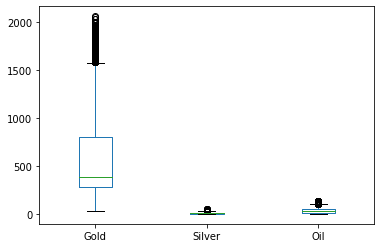

In [38]:
## Plotting the tidy standrized series visually
data_d_interpolated.plot.box()

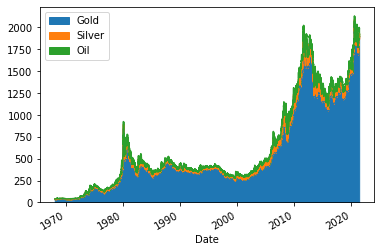

In [39]:
data_d_interpolated.plot.area() # stacked=False

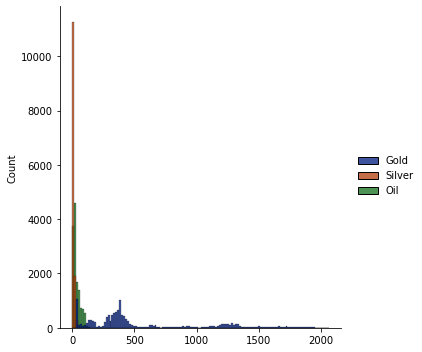

In [40]:
## Plotting the Frenquency-Distribution Visually
import seaborn as sns
# sns.set(color_codes=False) # T
sns.set_palette(sns.color_palette("dark")) # bright # deep
sns.displot(data_d[["Gold","Silver","Oil"]].dropna())

In [41]:
## Better still, using SciPy for padding [forworad-propagating] the following days to fill either 'Gold' OR 'Silver' NaNs
import scipy
from scipy.interpolate import Akima1DInterpolator
data_d_smooth=data_d_fill_na_oil_drop_na_2
# data_d_smoothl=data_d_smooth.fillna(method='pad') # method='ffill'
# data_d_smooth=data_d_smooth.fillna(method='time') # index aware method
data_d_smooth=data_d_smooth.interpolate(limit_direction='both', method='akima') # method with goal of smooth plotting
data_d_smooth.to_csv('data_d_smooth.csv')
data_d_smooth

,Gold,Silver,Oil
Date,,,
1968-01-02,35.18,2.173,3.07
1968-01-03,35.16,2.225,3.07
1968-01-04,35.14,2.171,3.07
1968-01-05,35.14,2.157,3.07
1968-01-08,35.14,2.163,3.07
...,...,...,...
2021-05-28,1892.45,27.630,65.17
2021-06-01,1907.70,28.210,65.17
2021-06-02,1895.90,27.745,65.17


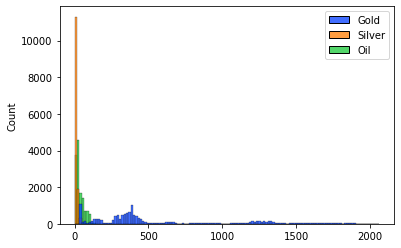

In [42]:
sns.set_palette(sns.color_palette("bright")) # dark # deep
# sns.displot(data_d_smooth[["Gold","Silver","Oil"]].dropna())
sns.histplot(data_d_smooth)

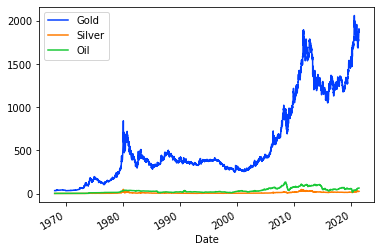

In [43]:
data_d_fill_na_all.plot()

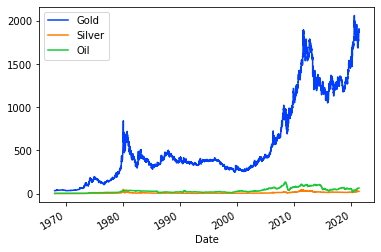

In [44]:
data_d_smooth.plot()

In [45]:
## Using the compare function for aligning the differences on columns
data_d_fill_na_all.compare(data_d_smooth,align_axis=1)

Gold              Silver          
             self       other    self     other
Date                                           
1968-03-18   35.2   35.536956     NaN       NaN
1968-03-19   35.2   35.704319     NaN       NaN
1968-03-20   35.2   35.894288     NaN       NaN
1968-03-21   35.2   36.101540     NaN       NaN
1968-03-22   35.2   36.320755     NaN       NaN
1968-03-25   35.2   36.996953     NaN       NaN
1968-03-26   35.2   37.210797     NaN       NaN
1968-03-27   35.2   37.409994     NaN       NaN
1968-03-28   35.2   37.589221     NaN       NaN
1968-03-29   35.2   37.743158     NaN       NaN
1968-11-20    NaN         NaN  2.0850  2.081023
1968-11-21    NaN         NaN  2.0850  2.092042
1968-11-22    NaN         NaN  2.0850  2.109004
1971-08-18    NaN         NaN  1.5920  1.592528
1971-08-19    NaN         NaN  1.5920  1.592659
1971-08-20    NaN         NaN  1.5920  1.592780
1971-12-20    NaN         NaN  1.4260  1.399401
1972-06-23    NaN         NaN  1.5650  1.567640
1972-06-26    NaN         NaN  1.5650  1.573640
1973-02-12    NaN         NaN  2.1360  2.223620
1973-02-13    NaN         NaN  2.1360  2.245307
1973-03-02    NaN         NaN  2.4920  2.533429
1973-03-05    NaN         NaN  2.4920  2.567841
1973-03-06    NaN         NaN  2.4920  2.554500
1973-03-07    NaN         NaN  2.4920  2.531326
1973-03-08    NaN         NaN  2.4920  2.499863
1973-03-09    NaN         NaN  2.4920  2.461655
1982-03-05    NaN         NaN  7.5275  7.410960
1983-02-05  501.0  496.588797     NaN       NaN
1987-10-16    NaN         NaN  7.8150  7.941004

# DSM020 _*Part 1c*_: _**CW1 Extras**_

## Stats Reporting

In [48]:
from sklearn.linear_model import LinearRegression
x=data_d_smooth.loc[:,["Gold","Silver"]]
y=data_d_smooth["Oil"]
reg=LinearRegression() # copy_X=True,fit_intercept=True,n_jobs=1,normalize=False
reg.fit(x,y)
reg.intercept_

6.603368031983209

In [49]:
reg.coef_

array([0.01941808, 1.80356233])

In [50]:
cols=data_d_smooth.loc[:,["Gold","Oil"]]
df=pd.DataFrame(cols)

In [51]:
from sklearn.model_selection import KFold
X=pd.DataFrame(data_d_smooth["Gold"])
Y=pd.DataFrame(data_d_smooth["Oil"])
reg_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)
ss=[]
kf=KFold(n_splits=3,shuffle=True,random_state=None)
for i,(train,test) in enumerate(kf.split(X,Y)):
  s=reg_model.fit(X.iloc[train,:],Y.iloc[train,:])
  ss.append(s)
print(ss)

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)]


In [52]:
import statsmodels.api as smodels
X,Y=np.array(X),np.array(Y)
X=smodels.add_constant(X)
stats_model=smodels.OLS(Y,X)
sss=stats_model.fit()
print(sss.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 2.374e+04
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:23:03   Log-Likelihood:                -57198.
No. Observations:               13513   AIC:                         1.144e+05
Df Residuals:                   13511   BIC:                         1.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9678      0.222     40.486      0.0

## PCA - Feature Selection/Engineering

In [53]:
# Importing PCA [Principal Component Analysis]
from sklearn.decomposition import PCA
# Building a PCA model
pca=PCA(n_components=3)
# data reductuion ndarray output 
pca_data = pca.fit_transform(data_d_smooth)
# pca_data shape inspection
pca_data.shape
# printing PCA data reductuion
print(pca_data)

[[-5.33152232e+02 -7.42191016e+00  9.36894987e-01]
 [-5.33171448e+02 -7.41691283e+00  9.88950487e-01]
 [-5.33192215e+02 -7.42019270e+00  9.35341037e-01]
 ...
 [ 1.32863333e+03 -3.07408297e+01  1.08663990e+00]
 [ 1.32488781e+03 -3.05643955e+01  1.13783283e+00]
 [ 1.30230828e+03 -2.95362454e+01  9.97512063e-01]]


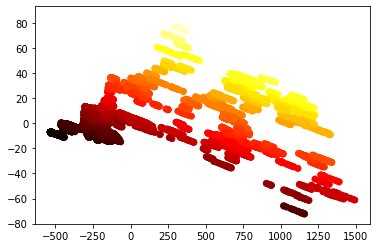

In [54]:
## Scatter-plotting possible correlations
import matplotlib.pyplot as plt
plt.scatter(pca_data[:,0],pca_data[:,1],c=y,cmap='hot')
plt.show()

Text(0.5, 1.0, 'Features Correlation')

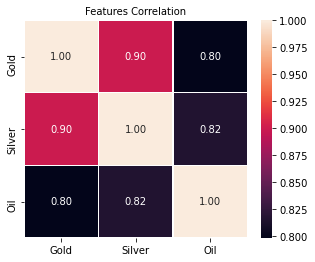

In [55]:
## Plttoing features correlation heatmap / matrix
data_d_corr=data_d_smooth.corr()
plt.figure(figsize=(5,4))
sns.heatmap(data_d_corr,
            xticklabels=data_d_corr.columns.values,
            yticklabels=data_d_corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.25)
plt.title('Features Correlation',y=1.0,size=10)

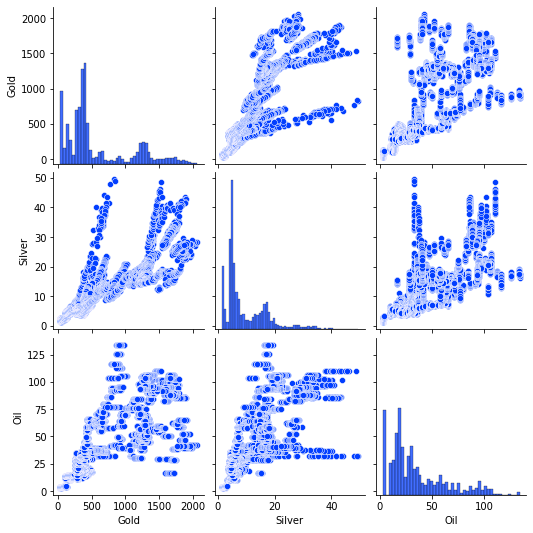

In [56]:
## ## Plttoing features correlation [scatterplot] matrix
sns.pairplot(data_d_smooth)

## Statistical Automation

In [57]:
## Automating Profiling via Pandas' or other python Libraries, once standardized and tidy
!pip install pandas-profiling==2.7.1
import pandas_profiling as pp

In [58]:
data_d_profile=pp.ProfileReport(data_d)
data_d_profile

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
data_d_smooth_profile=pp.ProfileReport(data_d_smooth)
data_d_smooth_profile

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> requirements.txt is attached so as enable replicating approach and outcomes (without any further instructions). 

In [60]:
## !pip install -r https://raw.githubusercontent.com/foresights/public/main/requirements.txt
!pip3 freeze > requirements.txt

In [61]:
#break

---

---

# DSM020 _*Part 1d*_: _**CW2 Preanalysis Alternatives**_

### Future Pending WIP (Work in Progress): datasets to be further correleted

In [62]:
gold_df = quandl.get('LBMA/GOLD',start_date=start_date,end_date=end_date)

In [63]:
gold_df

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-28,1892.45,1899.95,1333.800,1342.12,1552.38,1561.76
2021-06-01,1907.70,1899.35,1344.740,1339.23,1558.97,1551.77
2021-06-02,1895.90,1902.75,1341.160,1343.15,1555.97,1559.49


In [64]:
#f12f_df = quandl.get('RBA/F12_FUSXRGP',start_date=start_date,end_date=end_date)

In [65]:
f12_df = quandl.get('RBA/F12',start_date=start_date,end_date=end_date)

In [66]:
f12_df

,US dollar against the euro. Units: Euros per US dollar; Series ID: FUSXRE,US dollar against the Japanese yen. Units: Yen per US dollar; Series ID: FUSXRJY,US dollar against the UK pound sterling. Units: Pounds sterling per US dollar ; Series ID: FUSXRUKPS,US dollar against the Canadian dollar. Units: Canadian dollars per US dollar ; Series ID: FUSXRCD,US dollar against the Swiss franc. Units: Francs per US dollar; Series ID: FUSXRSF,US dollar trade-weighted index. Units: Index; March 1973 = 100; Series ID: FUSXRTWI,Gold price. Units: US dollars per troy ounce; Series ID: FUSXRGP
Date,,,,,,,
1980-01-30,NaN,238.92,0.4419,NaN,NaN,95.451300,653.00
1980-02-29,NaN,248.25,0.4382,NaN,NaN,96.926800,637.00
1980-03-31,NaN,249.40,0.4590,NaN,NaN,101.405100,494.50
1980-04-30,NaN,239.85,0.4410,NaN,NaN,97.186900,518.00
1980-05-30,NaN,224.85,0.4285,NaN,NaN,94.051400,535.50
...,...,...,...,...,...,...,...
2021-01-31,0.8264,104.51,0.7294,1.2866,0.8898,87.266003,1863.80
2021-02-28,0.8227,106.15,0.7165,1.2619,0.9060,87.397048,1742.85
2021-03-31,0.8541,110.87,0.7285,1.2620,0.9441,89.000000,1691.05


In [67]:
!pip install yfinance

In [68]:
import yfinance
gc_df = yfinance.download(tickers='GC=F',period='7d',interval='60m')

[*********************100%***********************]  1 of 1 completed


In [69]:
gc_df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-05-30 18:00:00-04:00,1906.800049,1908.000000,1906.000000,1906.800049,1906.800049,985
2021-05-30 19:00:00-04:00,1906.800049,1907.699951,1906.300049,1906.699951,1906.699951,917
2021-05-30 20:00:00-04:00,1906.599976,1908.599976,1905.300049,1907.900024,1907.900024,4015
2021-05-30 21:00:00-04:00,1907.800049,1911.500000,1907.400024,1910.199951,1910.199951,8935
2021-05-30 22:00:00-04:00,1910.300049,1913.099976,1909.599976,1912.699951,1912.699951,4698
...,...,...,...,...,...,...
2021-06-07 06:00:00-04:00,1886.500000,1889.300049,1886.099976,1887.099976,1887.099976,3509
2021-06-07 07:00:00-04:00,1887.000000,1890.800049,1886.900024,1889.300049,1889.300049,5905
2021-06-07 08:00:00-04:00,1889.400024,1889.500000,1886.699951,1889.400024,1889.400024,7281


---
---

## **Final Coursework Assignment (CW2)**

>	##### Part (II) CW2 **Direct URL** @ TBC

> ##### Part (I) CW1 **Commentable URL** @ https://colab.research.google.com/drive/1Vl8bTHOHiKZNsijIJucD1N-vV7jI0NuJ?usp=sharing

---